## Getting google street views in a city

This notebook illustrates how to collect google street views in a city using google maps API. 

* Step 1. Import street segments
* Step 2. Create a grid points along with street segments
* Step 3. Find nearby google street view locations from each grid
* Step 4. Collect google street views from identified google street view locations.


In [5]:
import matplotlib.pyplot as plt

# image size
plt.rcParams['figure.figsize'] = [20, 20]

import streetscape as ss
import osmnx as ox

# asnync in jupyter notebook
import nest_asyncio
nest_asyncio.apply()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Street Dataset

You can use any street dataset converted as geodataframe format. 

In [2]:
osm_street = ox.graph_from_place('Haywards Heath, UK')

In [3]:
# convert osmnx graph to geodataframe
streets = ss.graph2gdf(osm_street)

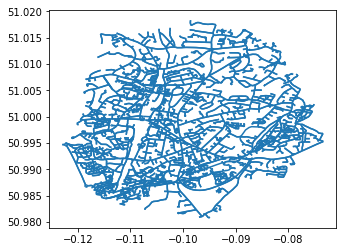

In [4]:
streets.plot()

## Create candidiate grid points
Create a 1D grid along with street segments. If grid distance is too large, chance of missing GSV location becomes larger.

In [6]:
grids = ss.generate_grids(streets, distance=8)

62105 grid points created


In [7]:
grids.head()

,geometry,point_id,seg_end,segment_id,metadata_url
0,POINT (-0.07336670000000001 50.9952681),0,1,5199427,https://maps.googleapis.com/maps/api/streetvie...
1,POINT (-0.07339995345644021 50.9952892402484),1,0,5199427,https://maps.googleapis.com/maps/api/streetvie...
2,POINT (-0.07348703288410686 50.99534459932772),2,0,5199427,https://maps.googleapis.com/maps/api/streetvie...
3,POINT (-0.07358322316871384 50.99538127756411),3,0,5199427,https://maps.googleapis.com/maps/api/streetvie...
4,POINT (-0.07368045935899452 50.99541581128218),4,0,5199427,https://maps.googleapis.com/maps/api/streetvie...


## Find GSV points
From each grid candidiate point, we will send a query asking the location of gsv points.
When you get an error like "Too many open files in system" in MACOSX or Linux, please increase 
the number of open files limit.

In [8]:
%%time
gsv_points = ss.identify_gsv_locations(grids)


9263 observation points retrieved.
CPU times: user 4min 59s, sys: 48.4 s, total: 5min 47s
Wall time: 12min 15s


In [10]:
print(len(gsv_points))
gsv_points.head()

9263


,index,copyright,date,pano_id,status,geometry
0,0,© Google,2017-06,7VbmzX28HsayLzftqCxUKg,OK,POINT (-0.0733641 50.9952888)
1,2,© Google,2017-06,hBw7nyFYbNEmgqnP9a2bMQ,OK,POINT (-0.07375464036488383 50.99542532553686)
2,3,© Google,2017-06,5LzL77zxa98k69reK9PuQw,OK,POINT (-0.0740147 50.9955059)
3,7,© Google,2017-06,Ag-jya4mCO2cFPNPd0VArA,OK,POINT (-0.0736048 50.9953789)
4,8,© Google,2017-06,tCcpSq6Dh5-jwreEtLNy3w,OK,POINT (-0.07350600352815902 50.99534625974742)


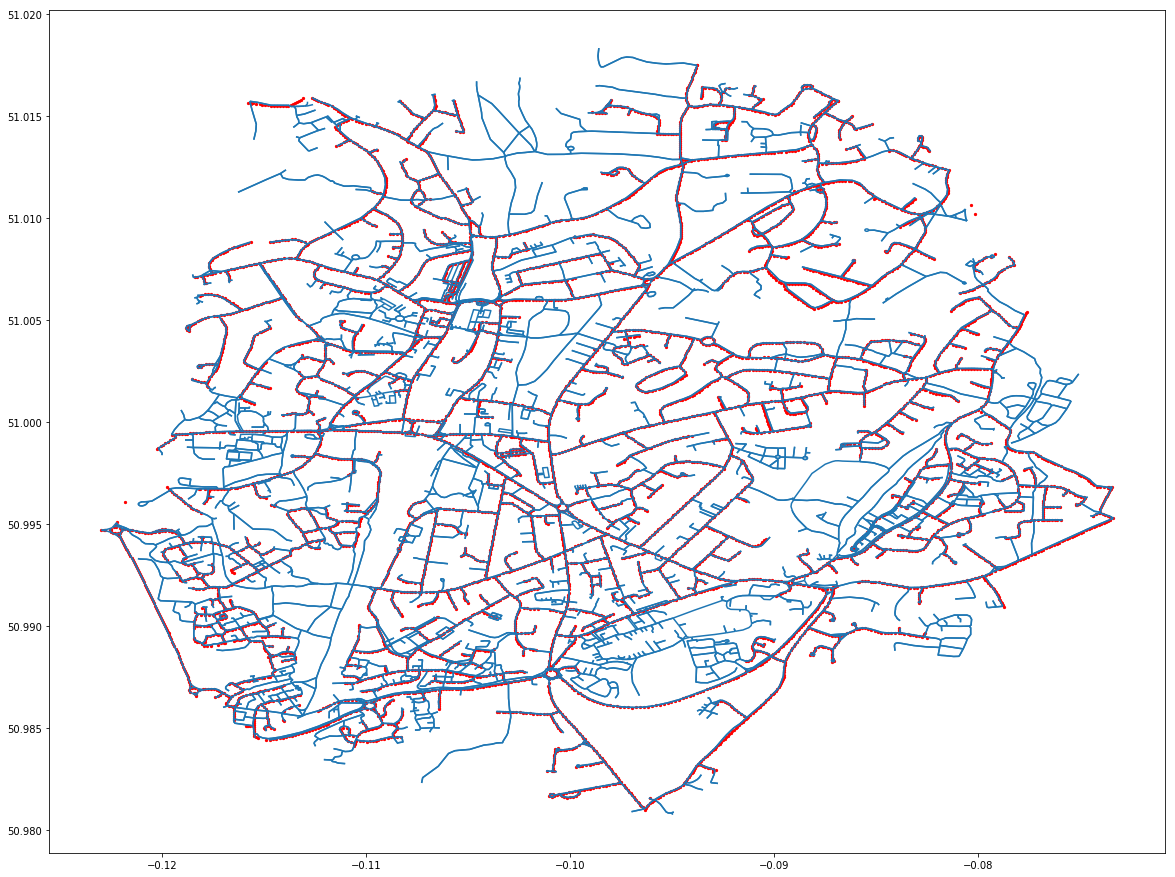

In [11]:
# plot identified GSV locations
plot_streets = streets.plot()
gsv_points.plot(ax=plot_streets, marker='o', color='red', markersize=5)

## Retrieve GSV images

We are going to retrieve GSV images from each GSV location identified above.
First we construct a URL for each GSV image and then download images from the URLs.

In [14]:
# npics (int): number of pictures at each location (default 6)
# size (int): size of image (image is square)
# pad (int): overlapped angle betweeen adjacent image
# prefix (str): default prefix for image name (default 'image')

gsv_urls = ss.make_gsv_urls(gsv_points.head(100),
                           npics=6,
                           size=400,
                           pad=2,
                           prefix='HaywardsHeath')

Total 600 urls created.


In [13]:
gsv_urls.head()

,gsv_name,gsv_url,pano_id
0,HaywardsHeath_0_0.jpg,https://maps.googleapis.com/maps/api/streetvie...,7VbmzX28HsayLzftqCxUKg
1,HaywardsHeath_0_60.jpg,https://maps.googleapis.com/maps/api/streetvie...,7VbmzX28HsayLzftqCxUKg
2,HaywardsHeath_0_120.jpg,https://maps.googleapis.com/maps/api/streetvie...,7VbmzX28HsayLzftqCxUKg
3,HaywardsHeath_0_180.jpg,https://maps.googleapis.com/maps/api/streetvie...,7VbmzX28HsayLzftqCxUKg
4,HaywardsHeath_0_240.jpg,https://maps.googleapis.com/maps/api/streetvie...,7VbmzX28HsayLzftqCxUKg


### Download images from urls

In [67]:
ss.download_gsvs(gsv_urls, save_dir='images')